In [4]:
# 필요한 패키지 설치
# !pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 4.2 MB/s eta 0:00:0

In [5]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122127 files and direct

In [1]:
# 라이브러리 로드
from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


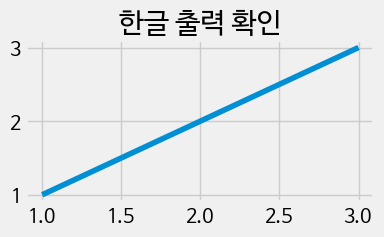

In [2]:
plt.figure(figsize=(4,2))
plt.title("한글 출력 확인")
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()

# Crieto Uplift Prediction Dataset

**분석 목표**

 광고를 보여주었을 때, 구매나 방문 확률이 **증가하는 사용자**를 식별하여, 마케팅 예산을 효율적으로 배분하기

**데이터 개요**

| 구분                 | 변수                    | 설명                         | 인과모델 내 역할                                           |
| ------------------ | --------------------- | -------------------------- | --------------------------------------------------- |
| **Treatment (T)**  | `treatment`           | 광고 노출 여부 (1: 노출, 0: 미노출)   | **처치 변수 (T)**                                       |
| **Outcome (Y)**    | `conversion`, `visit` | 전환 여부 / 방문 여부              | **결과 변수 (Y)** <br>→ 보통 하나를 선택하여 모델링함                |
| **Covariates (X)** | `f0` \~ `f11`         | 사용자 특성 (행동/인구통계 기반 범주형 변수) | **혼란 변수 (Confounder, X)** <br>→ T와 Y 모두에 영향을 줄 수 있음 |


In [3]:
#데이터 로드
import pandas as pd

df_origin = pd.read_csv("hf://datasets/criteo/criteo-uplift/criteo-research-uplift-v2.1.csv.gz")

In [4]:
df = df_origin.copy()
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


## 1. 데이터 기초 EDA

In [6]:
# 처치 그룹과 대조 그룹의 구성 비율 확인
df['treatment'].value_counts(normalize = True)

# 처치 그룹 85%, 대조 그룹 15%

,proportion
treatment,
1,0.85
0,0.15


In [17]:
# 처치그룹(treatment group)과 대조그룹(control group)별 전환 수 및 전환율 계산
treatment_group = df[df['treatment'] == 1]
control_group = df[df['treatment'] == 0]

# 처치그룹에서의 전환 사용자 수 및 전환율 계산
treatment_converted = treatment_group['conversion'].sum()
treatment_total = len(treatment_group)
treatment_conversion_rate = treatment_converted / treatment_total

# 대조그룹에서의 전환 사용자 수 및 전환율 계산
control_converted = control_group['conversion'].sum()
control_total = len(control_group)
control_conversion_rate = control_converted / control_total

# 요약 테이블 생성
summary_table = pd.DataFrame({
    '': ['전체 사용자 수', '전환된 사용자 수', '전환율 (%)'],
    'treatment group': [treatment_total, treatment_converted, f"{treatment_conversion_rate * 100:.2f}%"],
    'control group': [control_total, control_converted, f"{control_conversion_rate * 100:.2f}%"]
})
display(summary_table)

,,treatment group,control group
0,전체 사용자 수,11882655,2096937
1,전환된 사용자 수,36711,4063
2,전환율 (%),0.31%,0.19%


In [18]:
# 전환율 차이 계산
conversion_rate_difference = treatment_conversion_rate - control_conversion_rate
print(f"처치그룹과 대조그룹 간 전환율 차이: {conversion_rate_difference * 100:.2f}% "
      f"(처치그룹: {treatment_conversion_rate * 100:.2f}%, 대조그룹: {control_conversion_rate * 100:.2f}%)")
print("참고: 이는 단순한 전환율 차이이며, 실제 처치 효과(인과 효과)는 아님.")

처치그룹과 대조그룹 간 전환율 차이: 0.12% (처치그룹: 0.31%, 대조그룹: 0.19%)
참고: 이는 단순한 전환율 차이이며, 실제 처치 효과(인과 효과)는 아님.


In [8]:
# 방문 > 구매전환된 방문자의 비율
print('방문자 중에서 구매전환된 방문자의 비율:', round(df[df["visit"]==1]["conversion"].mean() * 100, 2), '%')

방문자 중에서 구매전환된 방문자의 비율: 6.21 %


## 2. 모델 학습 및 평가

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*9izLlmY-6fTw-EOH.png" width="600">


- 설득 가능 고객 (Persuadables):
처치를 받았을 때만 구매할 가능성이 높은 고객입니다.
➥ 업리프트 모델링의 주요 타겟층입니다.

- 확신 고객 (Sure Things):
처치를 받지 않아도 구매할 고객입니다.
➥ 마케팅 자원을 굳이 사용할 필요 없는 집단입니다.

- 무반응 고객 (Lost Causes):
처치를 해도 절대 구매하지 않을 고객입니다.
➥ 마케팅을 해도 효과가 없으므로 자원 낭비입니다.

- 역효과 고객 (Sleeping Dogs):
처치를 하면 오히려 구매 가능성이 줄어드는 드문 경우의 고객입니다.
➥ 마케팅을 하면 부정적인 결과를 초래할 수 있습니다.

📌 핵심 포인트:
쿠폰이나 광고 예산과 같은 마케팅 자원은 Persuadables에게 집중해야 하며,
Sure Things, Lost Causes, Sleeping Dogs에게는 투자 대비 효과가 없거나 오히려 손실이 될 수 있으므로 지양해야 합니다.

In [9]:
# 처치 그룹(treatment=1)과 대조 그룹(treatment=0)을 문자열로 변환
df['treatment_group'] = df['treatment'].map({0: 'control', 1: 'treatment'})

# 'visit', 'exposure' drop
df = df.drop(columns=['visit', 'exposure'])

# 데이터 샘플링 (전체 데이터 중 30%만 사용, 연산 감소)
df_sampled = df.sample(frac=0.3, random_state=42).copy()

# 학습용/테스트용으로 분할
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    df_sampled.drop(columns=['conversion', 'treatment', 'treatment_group']),
    df_sampled['conversion'],
    df_sampled['treatment_group'],
    test_size=0.3,
    random_state=42
)

In [10]:
# UpliftRandomForestClassifier 생성 및 학습
uplift_rf = UpliftRandomForestClassifier(
    control_name='control',
    n_estimators=10,        # 트리 개수 줄이기
    max_depth=5,            # 트리 깊이 제한
    min_samples_leaf=100    # 리프 최소 샘플 수 (연산 줄이고 일반화 높임)
)

uplift_rf.fit(X=X_train.values, treatment=treatment_train.values, y=y_train.values)

# 예측 수행
y_pred = uplift_rf.predict(X_test.values)

In [11]:
# 첫 번째 트리를 선택하여 시각화 준비
uplift_tree = uplift_rf.uplift_forest[0]

# 트리 구조를 문자열 형태로 출력
tree_str = uplift_tree_string(uplift_tree.fitted_uplift_tree, X_train.columns)
print(tree_str)

f11treatment_group_key >= -0.1686792210005612?
yes -> f6treatment_group_key >= -7.822229154977576?
		yes -> f0treatment_group_key >= 22.089979177429857?
				yes -> f6treatment_group_key >= -7.570316327275554?
						yes -> [np.float64(0.00014416035244322966), np.float64(0.0003193339781620738)]
						no  -> [np.float64(0.0), np.float64(0.0006189395502372602)]
				no  -> f2treatment_group_key >= 8.64307469041705?
						yes -> [np.float64(0.00023605584406825387), np.float64(0.000531058834021818)]
						no  -> [np.float64(0.0017659390238344802), np.float64(0.0020342053859935053)]
		no  -> f6treatment_group_key >= -9.564218962125777?
				yes -> f6treatment_group_key >= -9.436746762381834?
						yes -> [np.float64(0.0015920826161790018), np.float64(0.0018873695439727263)]
						no  -> [np.float64(0.0), np.float64(0.0016222677595628416)]
				no  -> f6treatment_group_key >= -9.864620538638?
						yes -> [np.float64(0.0), np.float64(0.0022109626900046063)]
						no  -> [np.float64(0.002163405316

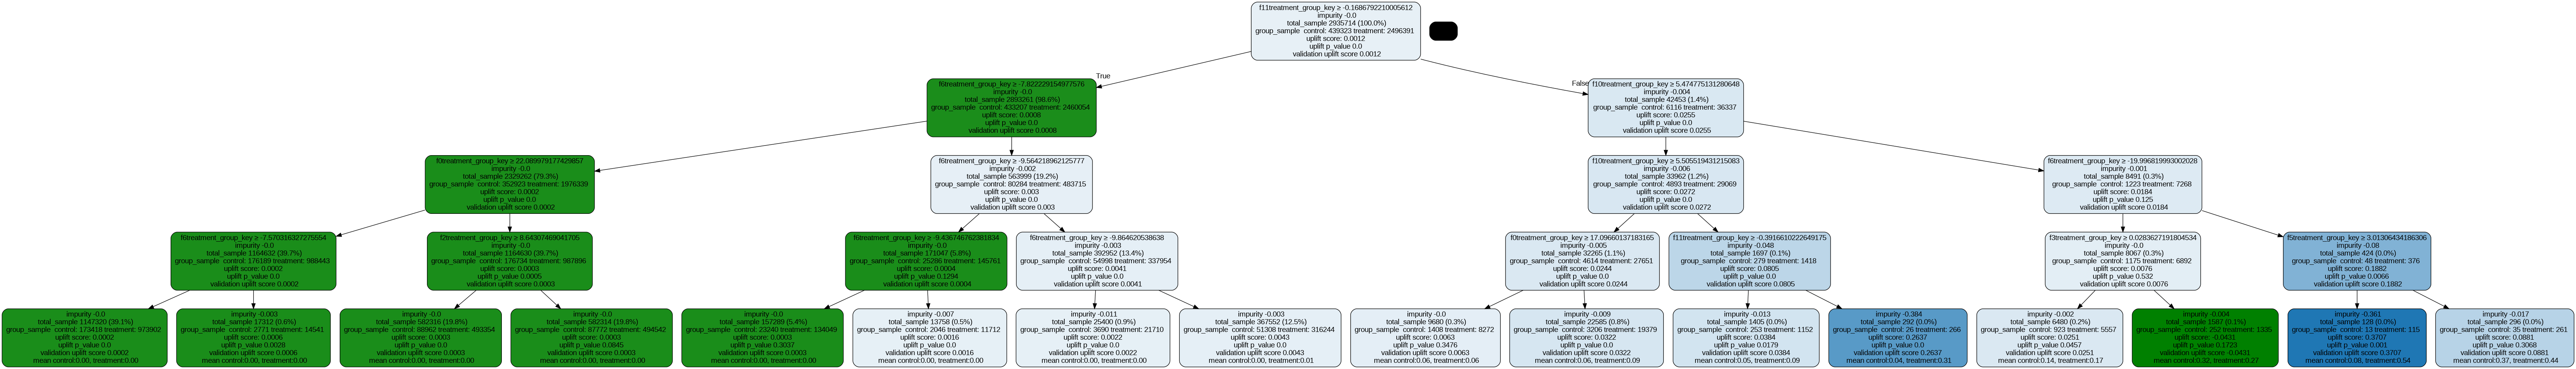

In [12]:
# uplift tree 시각화
from IPython.display import Image
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree, X_train.columns)
Image(graph.create_png())

| 구분          | 조건 예시                               | Control 전환율 | Treatment 전환율 | Uplift    | 전략             |
| ----------- | ----------------------------------- | ----------- | ------------- | --------- | -------------- |
| 🎯 설득 가능 고객 | f10 ≥ 6.16 & f2 ≥ 9.33 & f6 < -6.23 | 0.030       | 0.107         | **+7.7%** | 강한 마케팅 타겟      |
| 🎯 설득 가능 고객 | f10 ≥ 6.16 & f2 ≥ 9.33 & f6 ≥ -6.23 | 0.041       | 0.092         | **+5.1%** | 설득 가능한 고객, 타겟  |
| ✔️ 확신 고객    | f10 < 6.16 & f6 < -6.57             | 0.028       | 0.028         | 0.0%      | 확신 고객 (처치 불필요) |
| 🛑 무반응 고객   | f10 < 6.16 & f0 < 23.33 & f5 < 2.62 | 0.019       | 0.021         | **+0.2%** | 효과 미미, 제외 가능   |
| ❗ 역효과 가능성   | f10 ≥ 6.16 & f2 < 9.33 & f5 ≥ 3.12  | 0.011       | 0.007         | **-0.4%** | 역효과 가능성, 피해야 함 |


Text(0.5, 1.0, 'Feature Importances')

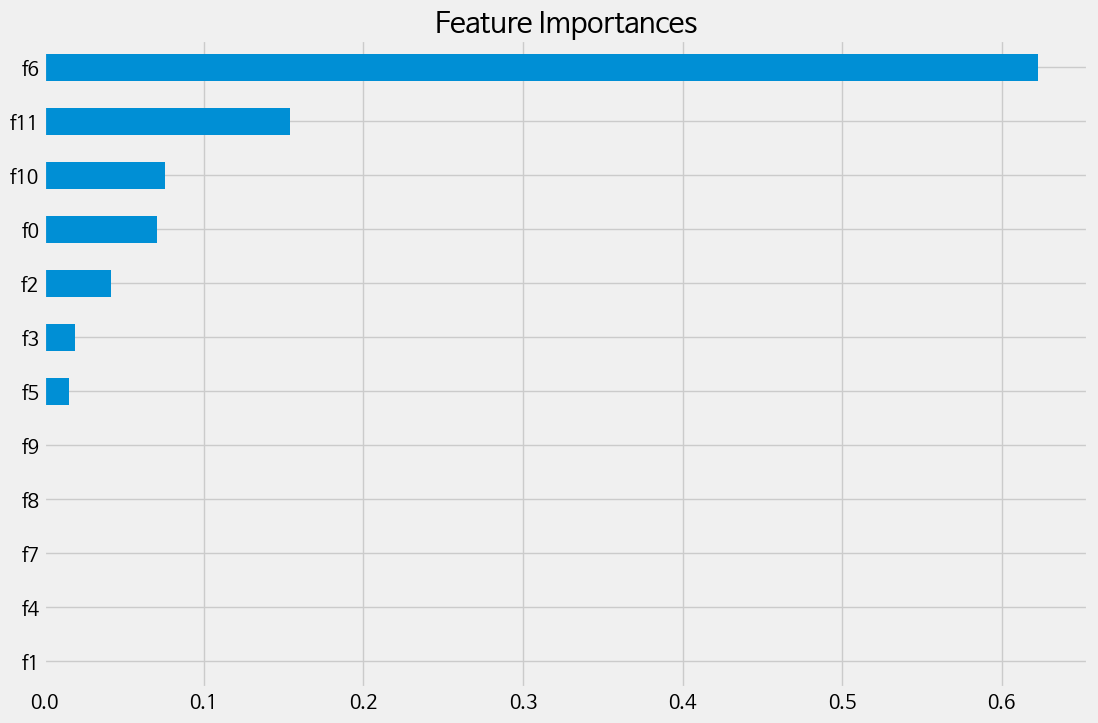

In [19]:
# Feature Importances 시각화
pd.Series(uplift_tree.feature_importances_, index = X_train.columns).sort_values().plot(kind='barh', figsize=(12,8))
plt.title('Feature Importances')

- 인사이트 요약

  -  **f6**는 가장 영향력 있는 변수로, 고객의 처치 반응을 잘 구분하는 기준이 됨  
  - **f11, f10, f0**는 보조 조건으로 사용되어 세분화에 기여함  
  - 중요도가 낮은 변수들은 모델 단순화 시 **제거 또는 파생 변수로 재구성** 가능  

---

- `f6` 기준으로 **1차 타겟 세그멘트 정의**
- `f11`, `f10`, `f0` 등은 **보조 세그멘트 조건 분기**로 활용
- 영향이 낮은 변수(`f1`, `f4` 등)는 **모델 튜닝 시 제거 고려**

In [14]:
uplift_results = pd.DataFrame(y_pred, columns=uplift_rf.classes_[1:])

best_treatment = np.where(uplift_results['treatment'] < 0, 'control', 'treatment')

auuc_metrics = (uplift_results.assign(is_treated=(treatment_test.values != 'control').astype(int),
                              conversion=pd.concat([X_test, y_test, treatment_test], axis=1)['conversion'].values,
                              uplift=uplift_results.max(axis=1))
                .drop(columns=list(uplift_rf.classes_[1:])))

# Print AUUC metrics DataFrame
print("AUUC metrics DataFrame:")
display(auuc_metrics)

AUUC metrics DataFrame:


,is_treated,conversion,uplift
0,0,0,0.000992
1,1,0,0.000972
2,1,0,0.000992
3,0,0,0.000992
4,1,0,0.000558
...,...,...,...
1258159,0,0,0.000601
1258160,0,0,0.000558
1258161,1,0,0.000992
1258162,1,0,0.002469


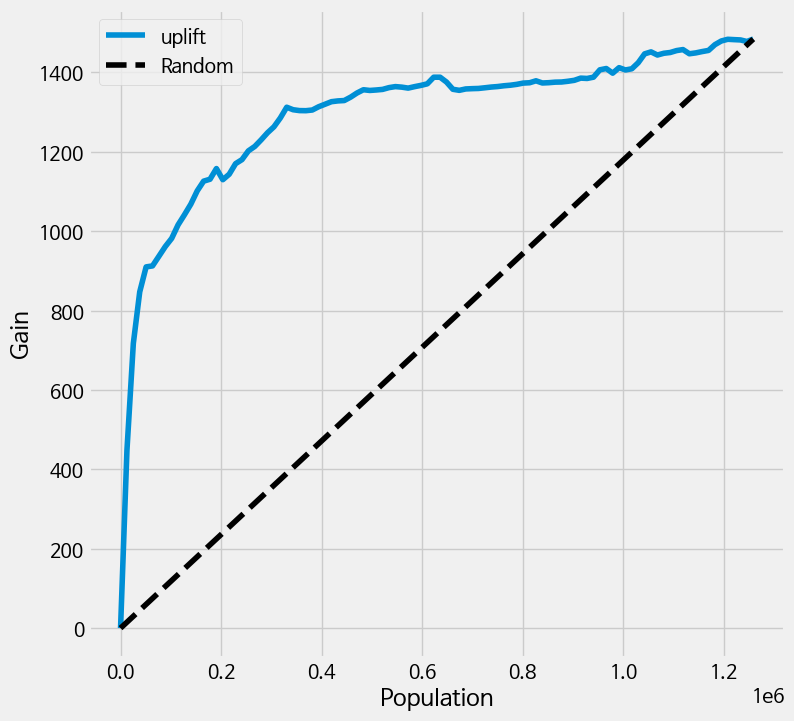

In [15]:
# uplift curve 시각화
from causalml.metrics import plot_gain, plot_qini
plot_gain(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')

AUUC는 업리프트 모델의 성능을 평가하는 지표로, ROC 커브의 면적을 나타내는 AUC와 유사한 개념

AUUC 값이 1에 가까울수록 모델이 처치 효과가 큰 집단과 작은 집단을 매우 잘 구분하고 있다는 의미

반면, 0.5에 가까운 값은 무작위 추측과 성능이 거의 다르지 않다는 것을 나타냄

- 이 경우 AUUC 점수가 0.87로, 모델이 업리프트 예측을 상당히 잘 수행하고 있으며, 실전에서 활용 가능한 수준임을 의미함

In [16]:
from causalml.metrics import auuc_score
score = auuc_score(auuc_metrics, outcome_col='conversion', treatment_col='is_treated')
print(score)

uplift    0.873972
dtype: float64
